# Python data analysis tutorial

## Some preliminaries:

**We're covering a lot of tools that could each probably fill hours of tutorial. The goal this session is not to give you complete command of them, but to give a taste of what you can do, and give you motivation and means to learn further.**

Sometimes I will fly over a code example without explaining it. If I do that, it's intentional -- I'm using the example to demonstrate that something *is* possible, rather than *how* it's possible. (So if you don't totally understand how an example works and I don't explain it, don't sweat it too much right now.)

Of course, I am happy to field questions about Python-related things after today,  for both things that I speed through and those that I spend more time on!

In this session, everything will be taught and demonstrated in a...

## [Jupyter notebook](https://jupyter.org/)

...which is a web application that allows you to create and share documents that contain explanatory text (in markdown syntax, like HTML), live (Python) code and code output...

In [1]:
word = 'Maude and June'
for letter in word:
    #print((' ' + letter) * len(word))
    print(letter)

M
a
u
d
e
 
a
n
d
 
J
u
n
e


...equations...

$$x_{1,2} = \frac{-b \pm \sqrt{b^2-4ac}}{2b}.$$

...and visualizations. A quick note about that:

Today I'll be working in a dark Jupyter Notebook theme, which I acquired by using the package I mentioned on this notebook's github repo. If you want to work in the default, pretty bright theme, it looks like this:

![](https://docs.microsoft.com/en-us/azure/virtual-machines/media/virtual-machines-linux-jupyter-notebook/ipy-notebook-spectral.png)

To accommodate the dark Jupyter theme, I am also modifying the seaborn default style to make plots that look legible on this darker background. If you are working in the default theme, you don't need to run the `set_style` chunk below (you can comment it out).

In [2]:
import pandas as pd
import seaborn as sns
#import matplotlib
#matplotlib.style.use('ggplot')

sns.set_style({  'axes.facecolor': 'gray',
                 'axes.labelcolor': 'white',
                 'figure.facecolor': 'gray',
                 'grid.color': '.8',
                 'image.cmap': u'Greys',
                 'text.color': 'white',
                 'xtick.color': 'white',
                 'ytick.color': 'white'})

%matplotlib inline

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


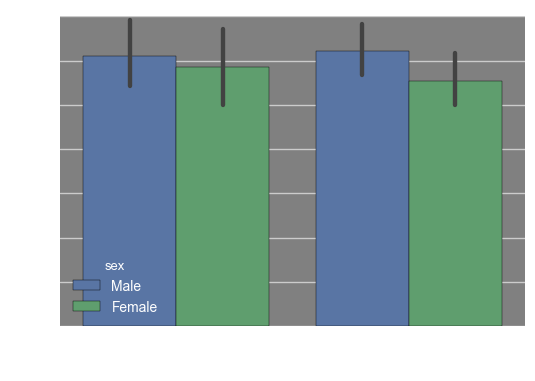

In [3]:
sns.barplot(x='smoker',y='tip',hue='sex',data=tips);

Again, if you are working in the default seaborn style, you should see something like this:

![](http://seaborn.pydata.org/_images/factorplot_bars.png)

For rest of tutorial, I'll just be using the dark style I set up, and I won't bring up any really bright images.

So those are the main capabilities of the notebook. When would you use that?
    - Teaching and demonstration (like now...)
    - Exploratory data analysis (most of my dissertation work)
    - Producing a well-documented, shareable, reproducible data analysis pipeline
    
#### Basically, #openscience

(But don't take my word for it! [Nature agrees!](http://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261))

### Interacting with the jupyter notebook

Working on a jupyter notebook is basically all about making 'cells', the chunks with markdown or code, and running them, moving them, etc.

Make a couple cells now, at least one with code and one with markdown, and run them. (Maybe also explore the toolbar and see what else you can do -- cut/paste/split/merge/run-all-above).

In [4]:
# a code cell, maybe?

In [5]:
# maybe you could change this to a markdown cell?

In [6]:
# you could merge this with the cell above, why not?

### Data analysis

#### Pandas

"[*pandas*](http://pandas.pydata.org/) is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language."

The basic datatypes of `pandas` are `Series` and, more importantly, `DataFrames`. 

A `Series` is sort of like a list -- its a sequence of items -- but it has labels on each of the items, and it has special attributes and methods available to it.

A `DataFrame` is basically a data table, with labeled rows and columns. Often, each row will be a participant/observation, and each column will be a variable/measurement. Like series, dataframes also afford special attributes and methods.

[Here's](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) a nifty cheatsheet of the pandas basics. And here's ["10 minutes to pandas"](http://pandas.pydata.org/pandas-docs/stable/10min.html#), a 'quick' tutorial that makes for a nice reference. (Some of what I'll go over is taken from that.)

##### Series

In [43]:
import numpy as np

# a simple series, built by passing a list to pd.Series()
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Some of the thing we can do with that series...

In [44]:
s.mean()

4.6

In [45]:
s.std()

2.701851217221259

We could standardize all of the values in that series like this:

In [46]:
s = ( s - s.mean() ) / s.std()
s

0   -1.332420
1   -0.592187
2    0.148047
3         NaN
4    0.518163
5    1.258396
dtype: float64

In [47]:
print(s.mean(),s.std(),sep='\n')

8.881784197001253e-17
0.9999999999999999


(Those are pretty much m=0 and std=1, as they should be, now. The slight deviance is due to how Python encodes floating point numbers. Usually -- **usually!** -- these deviances will be so small you don't care, but do be aware!)

The dataframe, though, is really the meat and potatoes of pandas (at least in my experience), so we'll focus more on those. We'll introduce them through some data generated by Monica's psychopy experiment

## Monica's PsychoPy Data

Remember Monica's experiment from a couple days ago?

The question was as follows...

The structure of the experiment was as follows...

Let's look at this data a bit. We'll use `pandas` to hold and manipulate the data, `Seaborn` to visualize it, and a little bit of `scipy.stats` to statistically analyze it.

In [8]:
import os

os.chdir('sample psychopy data')
os.listdir()

['data_01.txt',
 'data_02.txt',
 'data_03.txt',
 'data_04.txt',
 'data_05.txt',
 'data_06.txt',
 'data_07.txt',
 'data_08.txt',
 'data_09.txt',
 'data_10.txt']

In [9]:
data_01 = pd.read_table('data_01.txt')
data_01

,COND,V_STIM,A_STIM,KEY,RESP,ACC,RT
0,incongruent,happy,cry,left,incongruent,1,1.291
1,incongruent,sad,laugh,right,congruent,0,1.163
2,congruent,sad,cry,left,incongruent,0,1.353
3,congruent,happy,laugh,right,congruent,1,1.936


So now we see the basic structure of a dataframe. The column labels run across the top, while the index -- the row labels -- run along the left. You can access a particular column like this:

In [48]:
data_01['RT']

0    1.291
1    1.163
2    1.353
3    1.936
Name: RT, dtype: float64

And you can access a row like this:

In [49]:
data_01.loc[0]

COND      incongruent
V_STIM          happy
A_STIM            cry
KEY              left
RESP      incongruent
ACC                 1
RT              1.291
Name: 0, dtype: object

In [50]:
## DO I ALLUDE TO THE DIFFERENCE BETWEEN LABEL-BASED AND POSITION-BASED SELECTION????

You can access a particular *cell*, like this:

In [51]:
data_01.loc[0,'RT']

1.2909999999999999

All the tables have this structure, so let's just loop through all these files and make one big dataframe. We'll start with an empty dataframe, and as we loop through each individual file, we'll concatenate it to this dataframe.

In [10]:
psychopy_df = pd.DataFrame()
for data_file in os.listdir():
    psychopy_df = pd.concat(
                    [psychopy_df, 
                     pd.read_table(data_file)
                    ]
                  )
psychopy_df

,COND,V_STIM,A_STIM,KEY,RESP,ACC,RT
0,incongruent,happy,cry,left,incongruent,1,1.291
1,incongruent,sad,laugh,right,congruent,0,1.163
2,congruent,sad,cry,left,incongruent,0,1.353
3,congruent,happy,laugh,right,congruent,1,1.936
0,congruent,sad,cry,right,congruent,1,0.973
1,congruent,happy,laugh,right,congruent,1,1.192
2,incongruent,happy,cry,left,incongruent,1,0.816
3,incongruent,sad,laugh,left,incongruent,1,1.379
0,incongruent,happy,cry,left,incongruent,1,1.135
1,congruent,sad,cry,right,congruent,1,1.297


We can get a quick 'summary' of all the columns with the `.describe` method. Because the datatypes of the columns are mixed -- some have numerical data and some have categorical data -- we have to explicitly tell the `.describe` method to include all the columns, otherwise it'd just summarize the numerical columns.

In [12]:
psychopy_df.describe(include='all')

,COND,V_STIM,A_STIM,KEY,RESP,ACC,RT
count,40,40,40,40,40,40.000000,40.000000
unique,2,2,2,2,2,NaN,NaN
top,incongruent,sad,cry,right,congruent,NaN,NaN
freq,20,20,20,21,21,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.875000,1.118175
std,NaN,NaN,NaN,NaN,NaN,0.334932,0.339668
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.400000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,0.879500
50%,NaN,NaN,NaN,NaN,NaN,1.000000,1.122500
75%,NaN,NaN,NaN,NaN,NaN,1.000000,1.332250


So, this confirms that each categorical column is roughly evenly split between its possible values (e.g., congruent and incongruent). It also tells us that the accuracy rate ('mean') is ~88%, and the mean reaction time is 1.12s with a standard deviation of .34s.

What's the distribution of reaction times? Those are usually not normally distributed, so how about we check that out with a histogram?

First we access just the column with RT. That gives us a `Series` object, which we can then call the `.histogram` method on.

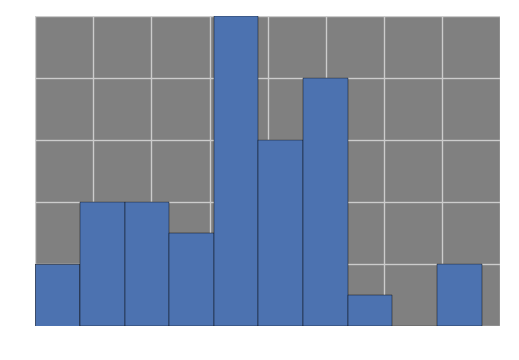

In [30]:
psychopy_df['RT'].hist();

Hmmm. Maybe we should impose a normal curve on that. `Seaborn` can help with that. We'll use the the `distplot` function it provides. We'll supply four arguments:

    a: The sequence of data for which we are computing the histogram. This will be psychopy_df['RT']
    bins: The number of bins into which the numerical values of 'a' will be placed. We'll want to match the number of bins that the pd.Series.hist() used, which happened to be 10 above.
    kde: We don't want a kernel density estimate of the distribution -- we want a simple normal curve overlay, so we'll set this to False
    fit: This is where we tell distplot what kind of curve we'll try to fit to our data. we want a normal distribution, so we'll give it scipy.stats.norm

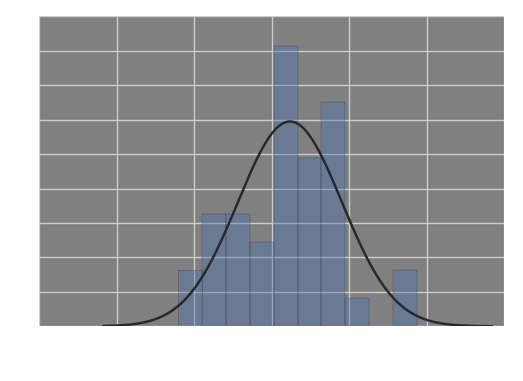

In [39]:
import scipy.stats

sns.distplot(a=psychopy_df['RT'], bins=10, kde=False, fit=scipy.stats.norm);

Voila.

So that's not the greatest fit to a normal curve, but not the worst either. It actually seems like maybe it has some *negative* skew, which is the opposite of what we normally see with reaction times (where we have some large positive values).

We could try transforming RT's...

But how about we break things down by condition? We can easily visualize this with a boxplot.

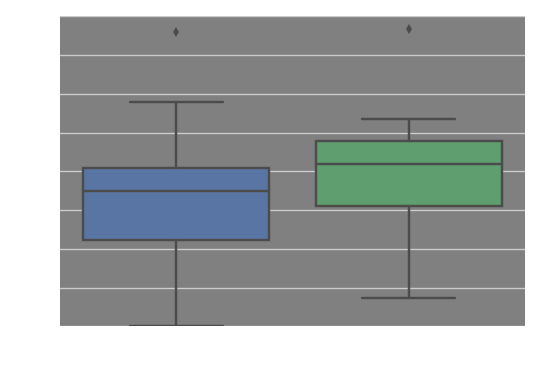

In [16]:
sns.boxplot(x='COND',y='RT',data=psychopy_df);

So people are a little faster to respond to incongruent trials? Is that what we expected?

What about accuracy? Since each trial can be correct or incorrect, there's no meaningful sense of variability in a condition, and it suffices to just compare accuracy rate across conditions. So, instead of a barplot or boxplot, we can do a `groupby` operation in pandas.

A `groupby` does what it sounds like -- you choose a variable (or variables) by which to 'group' your data, and then you can aggregate the data within those groups in some way. A common pattern is to groupby a particular condition, and then compute the means within those conditions, like below:

In [21]:
psychopy_df.groupby('COND').mean()

,ACC,RT
COND,,
congruent,0.90,1.16920
incongruent,0.85,1.06715


I said we can groupby variable*s*, so let's try that, too. Let's group by condition, then visual stimulus type. This will let us see the accuracy and RT for, e.g., congruent trials with a happy visual stimulus, congruent trials with a sad visual stimulus, etc.

In [26]:
psychopy_df.groupby(['COND','V_STIM']).mean()

ACC      RT
COND        V_STIM             
congruent   happy   1.0  1.0560
            sad     0.8  1.2824
incongruent happy   0.8  1.1169
            sad     0.9  1.0174

Once thing to bear in mind here is that as we do finer and finer groupby's, the n's in each cell get smaller and smaller. So the estimates get less reliable. Thus we should keep in mind how many observations are really in each cell. We can do that with a groupby operation and aggregating with the `.count` method.

In [27]:
psychopy_df.groupby(['COND','V_STIM']).count()

A_STIM  KEY  RESP  ACC  RT
COND        V_STIM                            
congruent   happy       10   10    10   10  10
            sad         10   10    10   10  10
incongruent happy       10   10    10   10  10
            sad         10   10    10   10  10

10 observations per cell is already sort of iffy, so let's not subdivide beyond 2 levels. BUT, we could try other groupings.

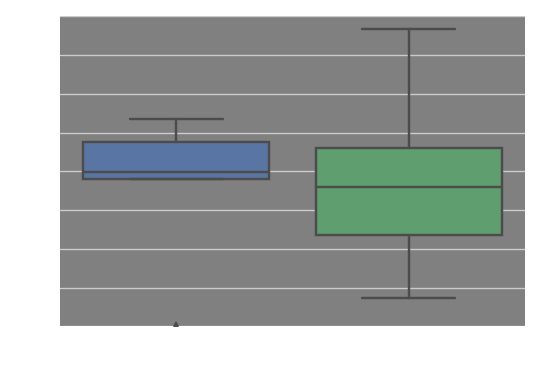

In [40]:
sns.boxplot(x='ACC',y='RT',data=psychopy_df);

Sensibly, reaction time is quicker when the judgment is correct.

## Russell's dissertation data**

** Initially collected with Matt Hall for a different project.

These data are of a volume and complexity that really motivates a programmatic analysis. I'm not really sure how one would do all the things I've needed to do with these data in Excel, SPSS, and other tools heavier on GUI's.